# Multiple Linear Regression 

- Understand problem defintion 
- Collect for revelent problem 
- Data Cleaning and preprocessing 
- Data Engineering and Feature Selection 
- Select model 
- Train the Model 
- Eveluate Model 

### Problem Statemt 

The goal of predict the profile of startup company. 
Features:
- R&D Spend
- Administration
- Marketing Spend
- State
- Profit

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
data = pd.read_csv("data/50_Startups.csv")

In [3]:
pd.set_option("display.max_columns",None)
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Data Cleaning

In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

First we perform onhotencoding 
- take column state 
- convert it into binary format

In [11]:
encoding_states = pd.get_dummies(data, columns=['State'],dtype='int')
encoding_states.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [13]:
# Split the data into X an y 
X = encoding_states.drop(['Profit'], axis=1)
y = encoding_states['Profit']

In [14]:
X.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [15]:
model = LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
print('Cofficient:',model.coef_)
print("Intercept:",model.intercept_)

Cofficient: [ 8.06023114e-01 -2.70043196e-02  2.69798610e-02 -5.23005912e+01
  1.46488202e+02 -9.41876104e+01]
Intercept: 50177.64442285088


In [18]:
y_pred = model.predict(X)
print("Predicted values:",y_pred)

Predicted values: [192390.57136321 189071.32010494 182276.18673283 173584.97618975
 172277.13381666 163473.8071184  158099.29278417 160155.64464939
 151634.74332631 154829.66252708 135664.64259063 135528.60078159
 129282.91780691 127431.24898632 149694.3827755  146143.63551378
 116854.0745287  130085.40993359 129149.72574273 115594.18840731
 116570.73444001 117201.50508975 114833.30513844 110123.79610587
 113294.37345154 102200.26891867 110765.3011688  114279.80403012
 101818.58738693 101721.04202941  99629.0105373   97617.29632021
  98988.23660304  98061.35894838  88974.70416296  90420.00960609
  75423.09286561  89577.70222194  69606.52160902  83684.9760399
  74762.74617648  74956.31104907  70575.99371382  60100.2682187
  64585.14721293  47588.36470994  56272.99268497  46468.23200485
  49123.07308284  48185.0387926 ]


In [20]:
print("R2_score:",r2_score(y,y_pred))
print("Mean Absoluate error:",mean_absolute_error(y,y_pred))

R2_score: 0.9507524843355148
Mean Absoluate error: 6475.500708609337


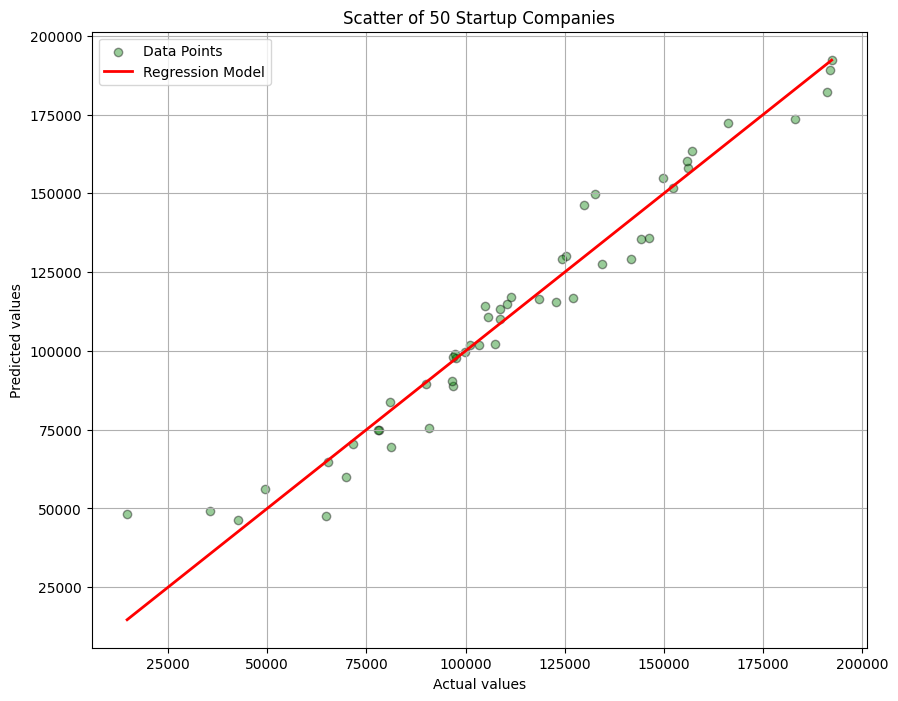

In [33]:
# Plot this values
plt.figure(figsize=(10,8))
plt.scatter(y,y_pred,color='green',alpha=0.4,edgecolors='black',label="Data Points")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label="Regression Model")  # reference line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatter of 50 Startup Companies")
plt.legend()
plt.grid()
plt.show()